# Fully-supervised Semantic Segmentation

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [85]:
import os
from pathlib import Path
import re

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [55]:
from config import IMAGE_DATA_DIR, GT_DIR, IMAGE_DATA_TILES_DIR, GT_TILES_DIR, TILES_DIR, LABELS, RED, BLACK, N1, N2, N_validation

In [18]:
BASE_DIR = Path('').absolute().parent; BASE_DIR

PosixPath('/Users/markus/Development/weakly_superv_learning')

In [23]:
image_tiles_fnames = os.listdir(BASE_DIR / IMAGE_DATA_TILES_DIR)

In [24]:
fname = image_tiles_fnames[0]

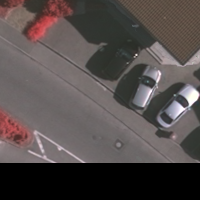

In [25]:
open_image( BASE_DIR / IMAGE_DATA_TILES_DIR / fname)

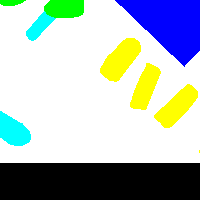

In [28]:
open_image(BASE_DIR / GT_TILES_DIR / fname)

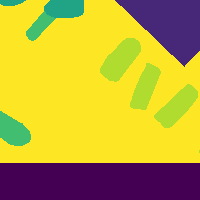

In [29]:
open_mask(BASE_DIR / GT_TILES_DIR / fname)

### Load data

In [122]:
def get_y_fn(x):
    return BASE_DIR / GT_TILES_DIR / x.name

In [126]:
base_path = "top_mosaic_09cm_area"
prog = re.compile(fr"{base_path}(?P<area_id>\d+)_tile(?P<tile_id>\d+).tif")

def is_in_set(x, N):
    fname = x.name  # e.g.: top_mosaic_09cm_area30_tile120.tif'

    match_result = prog.search(fname)
    area_id = match_result.group('area_id')
    tile_id = match_result.group('tile_id')
    image_fname = f"{base_path}{area_id}.tif"  # e.g.: top_mosaic_09cm_area30.tif'
    return image_fname in N

is_in_set_n1 = partial(is_in_set, N=N1)
is_in_set_n2 = partial(is_in_set, N=N1)
is_in_set_nvalidation = partial(is_in_set, N=N1)
is_in_set_n1_or_nvalidation = partial(is_in_set, N=N1+N_validation)

item_list = (SegmentationItemList.from_folder(BASE_DIR / IMAGE_DATA_TILES_DIR)
             .filter_by_func(is_in_set_n1_or_nvalidation)
             .split_by_valid_func(is_in_set_nvalidation)
             .label_from_func(get_y_fn, classes=LABELS+[RED, BLACK])
            )

In [127]:
# TODO transform(get_transforms(), size=size, tfm_y=True)
bs = 8
data = item_list.databunch(bs=bs)

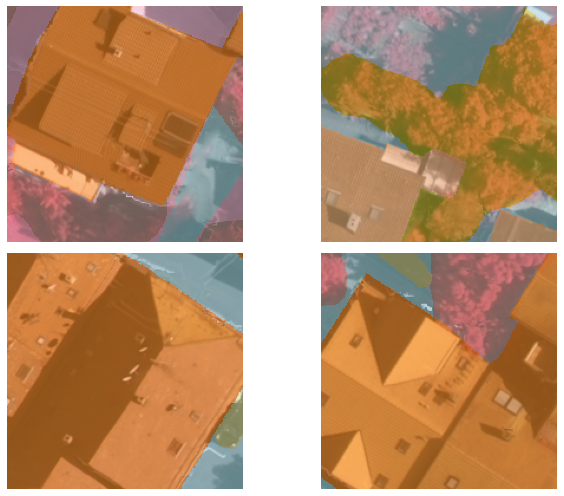

In [129]:
data.show_batch(2, figsize=(10,7))

In [98]:
item_list

# all tiles: 4497
# 935 / 4497 = 20%
# 390 / 4497 = 8.6%

# This seems to be the desired split

ItemLists;

Train: SegmentationItemList (935 items)
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
Path: /Users/markus/Development/weakly_superv_learning/data/ISPRS_semantic_labeling_Vaihingen/top_tiles;

Valid: SegmentationItemList (390 items)
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
Path: /Users/markus/Development/weakly_superv_learning/data/ISPRS_semantic_labeling_Vaihingen/top_tiles;

Test: None

Train and compare semantic segmentation networks, using the following data: Task (i) N1 pixel level labels